# Exploratory Analysis of Parallel Global Voices English-French Dataset

This notebook explores the characteristics and structure of the Parallel Global Voices English-French dataset sourced from Global Voices websites.

## Import Libraries

Let's start by importing the necessary libraries.

In [45]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import re
from collections import Counter

## Data Overview

Load the Parallel Global Voices English-French dataset using the `load_dataset` function from the `datasets` library and convert it to a Pandas DataFrame.

In [46]:
segmentation_dataset = load_dataset("Nicolas-BZRD/Parallel_Global_Voices_English_French", split='train').to_pandas()
segmentation_dataset.head()

,en,fr
0,Jamaica: “I am HIV”,Jamaïque : J’ai le VIH
1,"It's widely acknowledged, in the Caribbean and...","Il est largement reconnu, dans les Caraïbes et..."
2,"For this woman, however, photographed in the s...","Pour cette femme, cependant, photographiée dan..."
3,As Bacon writes on her blog:,Comme Bacon écrit sur son blog:
4,"“When I asked to take her picture, I suggested...",“Quand je lui ai demandé de la prendre en phot...


## Data Summary and Basic Statistics

### Statistical Summary

Let's start by examining basic statistics of the dataset to understand characteristics like text length, word count, etc.

In [47]:
# Display statistical summary for English text
english_text_summary = segmentation_dataset['en'].describe()
print("Statistical Summary for English Text:")
english_text_summary

Statistical Summary for English Text:


count                    342060
unique                   340653
top       Used with permission.
freq                         31
Name: en, dtype: object

In [48]:
# Display statistical summary for French text
french_text_summary = segmentation_dataset['fr'].describe()
print("\nStatistical Summary for French Text:")
french_text_summary


Statistical Summary for French Text:


count                                                342060
unique                                               341607
top       Ce billet fait partie du dossier de Global Voi...
freq                                                      8
Name: fr, dtype: object

### Checking for Missing Values

Let's check for missing values in the dataset to ensure data completeness.

In [49]:
# Check for missing values in English text
missing_values_english = segmentation_dataset['en'].isnull().sum()
print(f"\nMissing Values in English Text: {missing_values_english}")

# Check for missing values in French text
missing_values_french = segmentation_dataset['fr'].isnull().sum()
print(f"Missing Values in French Text: {missing_values_french}")


Missing Values in English Text: 0
Missing Values in French Text: 0


## Visualizing Text Length Distributions

### Histograms of Text Lengths

Visualize the distributions of text lengths in both English and French text using histograms.

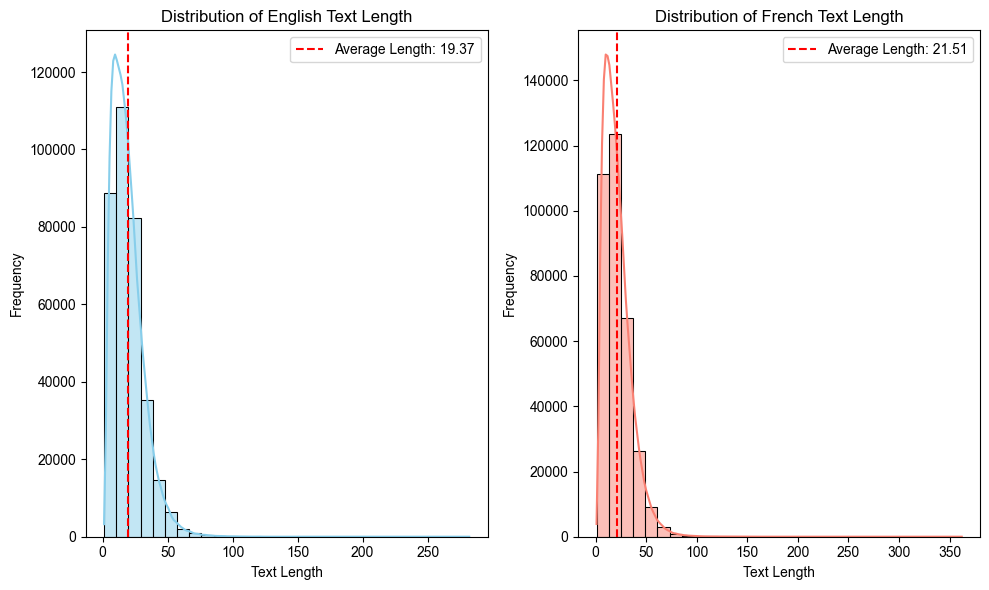

In [66]:
# Calculate text lengths for English and French text
segmentation_dataset['en_length'] = segmentation_dataset['en'].apply(lambda x: len(x.split()))
segmentation_dataset['fr_length'] = segmentation_dataset['fr'].apply(lambda x: len(x.split()))

# Plot histograms for text lengths
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(segmentation_dataset['en_length'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of English Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Add vertical line for average English text length
avg_en_length = segmentation_dataset['en_length'].mean()
plt.axvline(avg_en_length, color='red', linestyle='--', label=f'Average Length: {avg_en_length:.2f}')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(segmentation_dataset['fr_length'], bins=30, kde=True, color='salmon')
plt.title('Distribution of French Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

# Add vertical line for average French text length
avg_fr_length = segmentation_dataset['fr_length'].mean()
plt.axvline(avg_fr_length, color='red', linestyle='--', label=f'Average Length: {avg_fr_length:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

## Analysis for Special Characters, URLs, Tags, Numbers, etc.

### Special Characters

In [51]:
# Check for special characters in English text
special_chars_english = segmentation_dataset['en'].apply(
    lambda x: any(char.isdigit() or not char.isalnum() for char in x))
print(f"English Text with Special Characters: {special_chars_english.sum()} samples")

print("------")

# Check for special characters in French text
special_chars_french = segmentation_dataset['fr'].apply(
    lambda x: any(char.isdigit() or not char.isalnum() for char in x))

print(f"French Text with Special Characters: {special_chars_french.sum()} samples")

English Text with Special Characters: 342060 samples
------
French Text with Special Characters: 342060 samples


### URLs AND HTML Tags

In [52]:
# Check for URLs in English text
urls_english = segmentation_dataset['en'].str.contains(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', regex=True)
print(f"English Text with URLs: {urls_english.sum()} samples")

# Check for URLs in French text
urls_french = segmentation_dataset['fr'].str.contains(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', regex=True)
print(f"French Text with URLs: {urls_french.sum()} samples")

print("------")

# Check for HTML tags in English text
html_tags_english = segmentation_dataset['en'].str.contains(r'<[^>]+>', regex=True)
print(f"English Text with HTML Tags: {html_tags_english.sum()} samples")

# Check for HTML tags in French text
html_tags_french = segmentation_dataset['fr'].str.contains(r'<[^>]+>', regex=True)
print(f"French Text with HTML Tags: {html_tags_french.sum()} samples")

English Text with URLs: 1000 samples
French Text with URLs: 991 samples
------
English Text with HTML Tags: 16 samples
French Text with HTML Tags: 12 samples


In [53]:
# display samples with HTML tags
segmentation_dataset.loc[html_tags_english, 'en']

19862     Tax incentives to invest Africa: chance for de...
38047     I really want a beer tonight, but if I step ou...
43755     D.R. of Congo: Furor Over Kabila's <em>New Yor...
63591     </blockquote> The report saves special critici...
63596     And there seems to be very little we can do to...
82332     <a href="http://cultivandoaverdade.blogspot.co...
83508     <…> Today, you have a unique opportunity to ra...
85866     <em>Voci Globali</em>: Global Voices and La St...
94327     A man who will discuss it in a large group of ...
94331     <…> For many members this community was the on...
94336               Someone's life is better after it?  <…>
100334    Togolese High School Students via Paul-W on Fl...
104813    <zardari pvt limited>, we are a limited liabil...
127483    <…> Several people advised me today to avoid w...
138252    Scared (>_< )(>_< )(>_< ) Earthquake warning (...
237170    The New Year's celebration is over <…>, and I ...
Name: en, dtype: object

### Numerical Values


In [54]:
# Check for numerical values in English text
numeric_values_english = segmentation_dataset['en'].apply(lambda x: any(char.isdigit() for char in x))
print(f"English Text with Numerical Values: {numeric_values_english.sum()} samples")

print("------")

# Check for numerical values in French text
numeric_values_french = segmentation_dataset['fr'].apply(lambda x: any(char.isdigit() for char in x))
print(f"French Text with Numerical Values: {numeric_values_french.sum()} samples")


English Text with Numerical Values: 48642 samples
------
French Text with Numerical Values: 48641 samples


Let's dive deeper into the analysis of the dataset to understand the characteristics of the text in the dataset. The objective now is to understand the presence of special characters, URLs, HTML tags, and numerical values in the text.

In [55]:
def compute_char_stats(text_column):
    char_freq = Counter("".join(text_column))
    return char_freq

# Compute statistics for unique characters in English text
english_char_stats = compute_char_stats(segmentation_dataset['en'])

# Compute statistics for unique characters in French text
french_char_stats = compute_char_stats(segmentation_dataset['fr'])

# Combine English and French character statistics
char_stats_combined = {char: {
    'English_Frequency': english_char_stats[char], 'French_Frequency': french_char_stats[char]} for char in english_char_stats | french_char_stats}

# Create DataFrame from combined character statistics
char_stats_df = pd.DataFrame.from_dict(
    char_stats_combined, orient='index').reset_index()
char_stats_df.columns = ['Character', 'English_Frequency', 'French_Frequency']

# Display the character statistics DataFrame
char_stats_df.head()

,Character,English_Frequency,French_Frequency
0,J,25080,35180
1,a,2655903,2776748
2,m,746135,956131
3,i,2411602,2622643
4,c,937166,1078660


Now let's keep inside our char stats dataframe only the special characters that are present in the English and French text.

In [64]:
# keep only the special characters but without the punctuation marks or apostrophe (') or (’) and non-alphanumeric characters
special_char_stats_df = char_stats_df[char_stats_df['Character'].apply(
    lambda x: not x.isdigit() and x not in string.punctuation and x not in ["'", '’']) & char_stats_df['Character'].apply(lambda x: not x.isalnum())]

# remove the space character
special_char_stats_df = special_char_stats_df[special_char_stats_df['Character'] != ' ']

print("Number of special characters: ", special_char_stats_df['Character'].count())

special_char_stats_df

Number of special characters:  141


,Character,English_Frequency,French_Frequency
7,“,39608,36396
11,”,38709,36047
63,‘,7644,3897
69,…,13818,14095
76,´,128,111
...,...,...,...
2312,㎥,1,1
2449,．,0,1
2476,¥,0,1
2541,≠,0,1


Okay, now that we have our special characters, let's try to create a toy pre-processing function that removes them from the English and French text.

In [57]:
def remove_special_chars(text):
    for char in special_char_stats_df['Character']:
        text = text.replace(char, '')
    return text

In [65]:
# lets remove the special characters from the English and French text
segmentation_dataset['en'] = segmentation_dataset['en'].apply(remove_special_chars)
segmentation_dataset['fr'] = segmentation_dataset['fr'].apply(remove_special_chars)

segmentation_dataset

,en,fr,en_length,fr_length
0,Jamaica: I am HIV,Jamaïque : J’ai le VIH,4,5
1,"It's widely acknowledged, in the Caribbean and...","Il est largement reconnu, dans les Caraïbes et...",33,40
2,"For this woman, however, photographed in the s...","Pour cette femme, cependant, photographiée dan...",24,29
3,As Bacon writes on her blog:,Comme Bacon écrit sur son blog:,6,6
4,"When I asked to take her picture, I suggested ...",Quand je lui ai demandé de la prendre en photo...,15,18
...,...,...,...,...
342055,"But now, it's always pain.","Maintenant, tout n'est que souffrance.",5,6
342056,As of todaytoday is the beginning of a new lif...,A partir d'aujourd'hui une nouvelle vie comme...,12,11
342057,"When I contacted Bishnu eight months later, sh...",Lorsque j'ai contacté Bishnu huit mois plus ta...,17,18
342058,"She's planning for her future, just as she was...","Elle fait des plans pour l'avenir, tout comme ...",19,22
